<h1> <b> Lab - 11 </b> </h1>
<h3>Support Vector Machine</h3>
<br>

<br/><h2> <b> Import necessary modules.</b> </h2><br/>

In [27]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

# Basic SVM On Random Dataset

<br/><h2> <b> Load the data with 2 class labels.</b> </h2><br/>

In [28]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs

# creating datasets X containing n_samples
# Y containing two classes

X, Y = make_blobs(n_samples = 300, centers = 2, random_state = 46, cluster_std = 0.40)

<br/><h2> <b> Plot scatters.</b> </h2><br/>

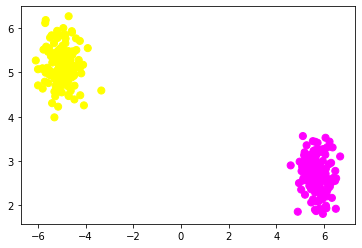

In [29]:
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = 'spring');
plt.show()

<br/><h2> <b> Splitting the dataset into training and testing data.</b> </h2><br/>

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

<br/><h2> <b> Functions for plotting the decision boundary.</b> </h2><br/>

In [31]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

In [32]:
def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

In [33]:
from matplotlib.colors import ListedColormap
zero_one_colourmap = ListedColormap(('blue', 'red'))

def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
  stop = X_set[:, 0].max() + 1,
  step = 0.01),

  np.arange(start = X_set[:, 1].min() - 1,
  stop = X_set[:, 1].max() + 1,
  step = 0.01))

  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),

  X2.ravel()]).T).reshape(X1.shape),

  alpha = 0.75,
  cmap = zero_one_colourmap)

  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = (zero_one_colourmap)(i), label = j)

  plt.title('SVM Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()

<br/><h2> <b>Create a linear SVM classifier.</b> </h2><br/>

In [34]:
clf = svm.SVC(kernel = 'linear')

<br/><h2> <b> Train classifier.</b> </h2><br/>

In [35]:
clf = clf.fit(X_train, y_train)

<br/><h2> <b> Plot the decision boundary.</b> </h2><br/>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


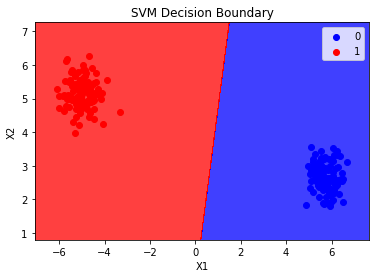

In [36]:
plot_decision_boundary(X_train, y_train, clf)

<br/><h2> <b> Make predictions.</b> </h2><br/>

In [37]:
y_pred = clf.predict(X_test)

<br/><h2> <b> Find accuracy.</b> </h2><br/>

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

No handles with labels found to put in legend.


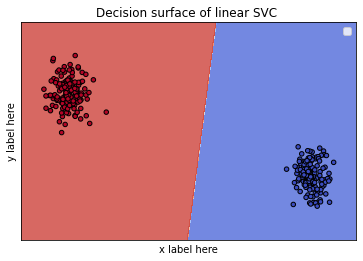

In [39]:
fig, ax = plt.subplots()

# title for the plots
title = ('Decision surface of linear SVC ')

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()

# SVM On Breast Cancer Dataset

<br/><h2> <b> Load the data.</b> </h2><br/>

In [40]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

<br/><h2> <b> Print the names of the features.</b> </h2><br/>

In [41]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<br/><h2> <b> Print the lables of the class.</b> </h2><br/>

In [42]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

<br/><h2> <b> Extract features and targets from the data.</b> </h2><br/>

In [43]:
features = cancer.data
targets = cancer.target 

<br/><h2> <b> Print the shape of the feature.</b> </h2><br/>

In [44]:
features.shape

(569, 30)

<br/><h2> <b> Print the cancer labels.</b> </h2><br/>

In [45]:
# (0:malignant, 1:benign)
targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

<br/><h2> <b> Plotting scatters.</b> </h2><br/>

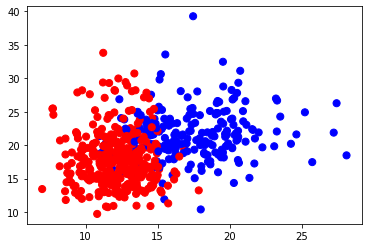

In [46]:
# plotting scatters

plt.scatter(features[:, 0], features[:, 1], c = targets, s=50, cmap = 'bwr')

<br/><h2> <b> Splitting the dataset into training and testing data.</b> </h2><br/>

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.20)

<br/><h2> <b> Creating the model, training the model and making the predictions.</b> </h2><br/>

In [48]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
classification = svm.SVC(kernel = 'linear')

#Train the model using the training sets
classfication = classification.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

<br/><h2> <b> Finding the accuracy, precision, recall.</b> </h2><br/>

In [49]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9473684210526315
Precision: 0.9285714285714286
Recall: 0.9848484848484849
